In [1]:
%%time
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_excel("output.xlsx")

Wall time: 33.6 s


In [2]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,22752,set 7 babushka nesting boxes,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
1,536365,21730,glass star frosted t-light holder,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
2,536366,22633,hand warmer union jack,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
3,536366,22632,hand warmer red polka dot,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
4,536367,22745,poppy's playhouse bedroom,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047,United Kingdom


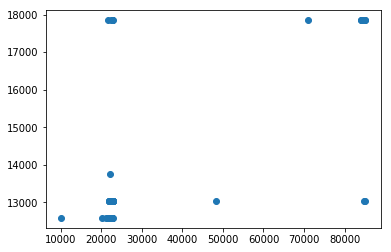

In [3]:
plt.scatter(df['StockCode'],df['CustomerID'])

In [4]:
import time

t = time.process_time()
km=KMeans(n_clusters=4)
elapsed_time = time.process_time()-t
print(elapsed_time)

0.0


In [5]:
y_predicted=km.fit_predict(df[['StockCode','CustomerID']])

In [6]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 3])

In [7]:
df['cluster']=y_predicted
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,22752,set 7 babushka nesting boxes,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0
1,536365,21730,glass star frosted t-light holder,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0
2,536366,22633,hand warmer union jack,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0
3,536366,22632,hand warmer red polka dot,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0
4,536367,22745,poppy's playhouse bedroom,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,0


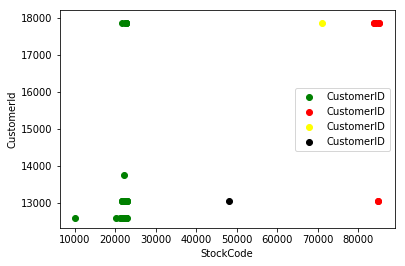

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]

plt.scatter(df1['StockCode'],df1['CustomerID'],color='green')
plt.scatter(df2['StockCode'],df2['CustomerID'],color='red')
plt.scatter(df3['StockCode'],df3['CustomerID'],color='yellow')
plt.scatter(df4['StockCode'],df4['CustomerID'],color='black')

plt.xlabel('StockCode')
plt.ylabel('CustomerId')
plt.legend()


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()
scaler.fit(df[['CustomerID']])
df[['CustomerID']]=scaler.transform(df[['CustomerID']])
df.head()

scaler.fit(df[['StockCode']])
df[['StockCode']]=scaler.transform(df[['StockCode']])
df.head()


C:\Users\Ashish Jha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Ashish Jha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,0.169726,set 7 babushka nesting boxes,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,1.000000,United Kingdom,0
1,536365,0.156121,glass star frosted t-light holder,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,1.000000,United Kingdom,0
2,536366,0.168142,hand warmer union jack,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,1.000000,United Kingdom,0
3,536366,0.168129,hand warmer red polka dot,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,1.000000,United Kingdom,0
4,536367,0.169633,poppy's playhouse bedroom,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,0.088096,United Kingdom,0


In [12]:
df.tail()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
45,536365,0.985437,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,1.000000,United Kingdom,1
46,536367,0.996752,assorted colour bird ornament,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,0.088096,United Kingdom,1
47,536367,0.997950,box of 6 assorted colour teaspoons,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,2010-12-01 08:34:00,4.25,0.088096,United Kingdom,1
48,536373,1.000000,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,1.000000,United Kingdom,1
49,536367,0.508313,doormat new england,DOORMAT NEW ENGLAND,4,2010-12-01 08:34:00,7.95,0.088096,United Kingdom,3


In [13]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['StockCode','CustomerID']])
    sse.append(km.inertia_)

In [14]:
sse

[12.921735350541852,
 3.4784308937072503,
 1.577867879443897,
 0.2732965975125973,
 0.1526367857559635,
 0.07093754169585201,
 0.04406829181933872,
 0.019022808329831428,
 0.0024660088780959527]

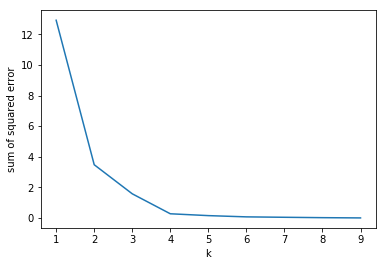

In [15]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [16]:
df.to_excel("output.xlsx")